In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import hvplot.pandas
import numpy as np
%matplotlib inline

In [16]:
# Stored the data in a Pandas DataFrame
# Read the data from the SP500.csv file into a Pandas DataFrame
df_SP500 = pd.read_csv(
    'SP500.csv',
    index_col='Date',
    parse_dates=True,
).dropna()

# Review the DataFrame
df_SP500.head()

,Close/Last,Open,High,Low
Date,,,,
2024-01-31,4845.65,4899.19,4906.75,4845.15
2024-01-30,4924.97,4925.89,4931.09,4916.27
2024-01-29,4927.93,4892.95,4929.31,4887.40
2024-01-26,4890.97,4888.91,4906.69,4881.47
2024-01-25,4894.16,4886.66,4898.15,4869.34


In [17]:
# Display column names for better context
df_SP500.columns

Index(['Close/Last', 'Open', 'High', 'Low'], dtype='object')

In [19]:
# Plot the DataFrame
df_SP500.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [21]:
selected_columns = df_SP500[['Close/Last']]

In [22]:
selected_columns.head()

,Close/Last
Date,
2024-01-31,4845.65
2024-01-30,4924.97
2024-01-29,4927.93
2024-01-26,4890.97
2024-01-25,4894.16


In [24]:
# Reset the index of the DataFrame
prophet_df_SP500 = selected_columns.reset_index()

# Review the first and last five rows of the DataFrame
display(prophet_df_SP500.head())
display(prophet_df_SP500.tail())

,Date,Close/Last
0,2024-01-31,4845.65
1,2024-01-30,4924.97
2,2024-01-29,4927.93
3,2024-01-26,4890.97
4,2024-01-25,4894.16


,Date,Close/Last
1253,2019-02-07,2706.05
1254,2019-02-06,2731.61
1255,2019-02-05,2737.70
1256,2019-02-04,2724.87
1257,2019-02-01,2706.53


In [25]:
# Rename the columns to names that Prophet recognizes
prophet_df_SP500.rename(columns={'Date': 'ds', 'Close/Last': 'y'}, inplace=True)


In [26]:
# Prepared the training data to be read into a prophet model
prophet_df_SP500.head()

,ds,y
0,2024-01-31,4845.65
1,2024-01-30,4924.97
2,2024-01-29,4927.93
3,2024-01-26,4890.97
4,2024-01-25,4894.16


In [76]:
# Initialize the Prophet model
model = Prophet()

# Fit the model with your dataframe
model.fit(prophet_df_SP500)

# Create a DataFrame for future predictions (predicting from 2024 Jan, 31 to 2025 Jan, 31)
future = model.make_future_dataframe(periods=365)  

# Use the model to make predictions
forecast = model.predict(future)

# Filter the forecast DataFrame to include data from January 31, 2024, onwards
forecast_from_2024 = forecast[forecast['ds'] >= '2024-01-31']


20:55:48 - cmdstanpy - INFO - Chain [1] start processing
20:55:48 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
# Showing the 25
forecast_from_2024.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1257,2024-01-31,4719.622002,4674.397603,4931.109251,4719.622002,4719.622002,81.118541,81.118541,81.118541,13.600951,13.600951,13.600951,67.517590,67.517590,67.517590,0.0,0.0,0.0,4800.740542
1258,2024-02-01,4721.718373,4677.289389,4941.823100,4721.718373,4721.718373,83.803127,83.803127,83.803127,12.532170,12.532170,12.532170,71.270957,71.270957,71.270957,0.0,0.0,0.0,4805.521500
1259,2024-02-02,4723.814744,4674.635610,4942.898600,4723.814744,4723.814744,89.499414,89.499414,89.499414,14.497416,14.497416,14.497416,75.001998,75.001998,75.001998,0.0,0.0,0.0,4813.314158
1260,2024-02-03,4725.911115,4649.338065,4903.090783,4725.911115,4725.911115,44.235020,44.235020,44.235020,-34.392088,-34.392088,-34.392088,78.627108,78.627108,78.627108,0.0,0.0,0.0,4770.146135
1261,2024-02-04,4728.007487,4645.184796,4903.895958,4728.007487,4728.007487,47.669542,47.669542,47.669542,-34.392088,-34.392088,-34.392088,82.061630,82.061630,82.061630,0.0,0.0,0.0,4775.677029


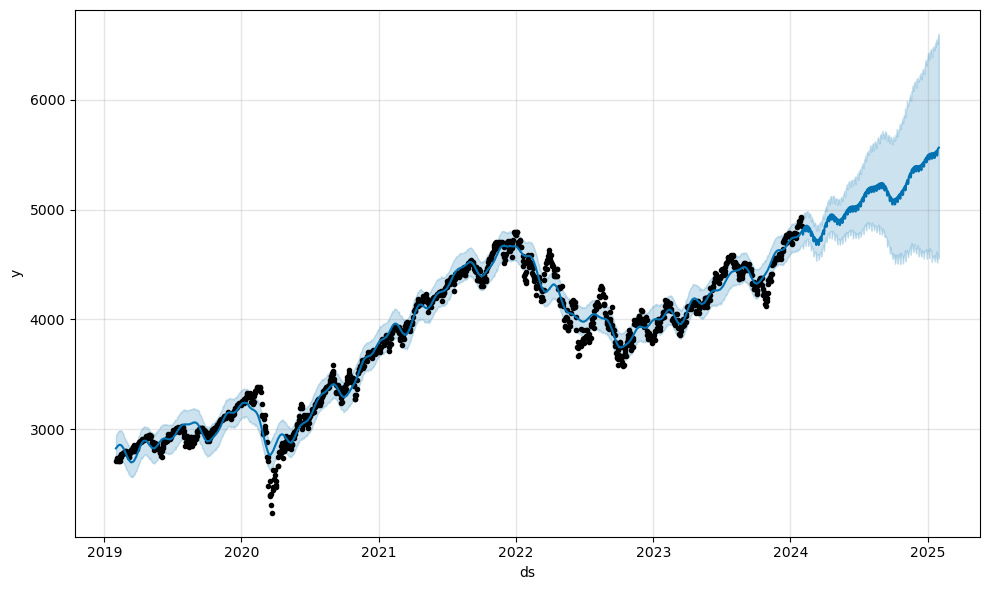

In [78]:
# Plotted the Prophet predictions for the S&P500 data
figures = model.plot(forecast)

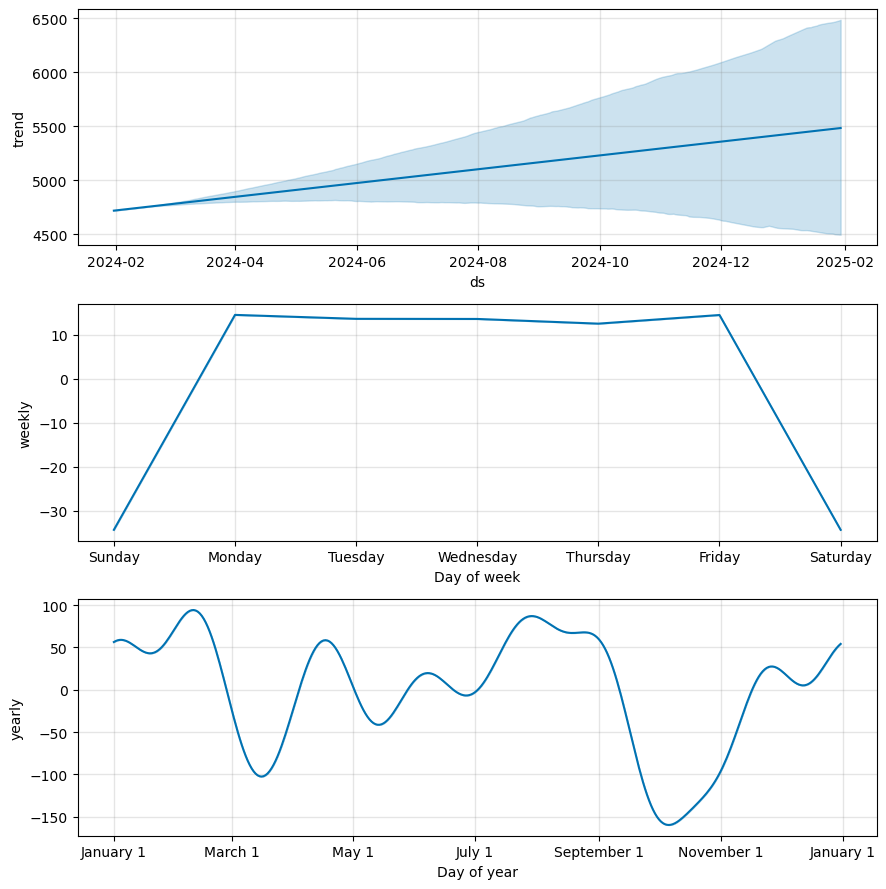

In [79]:
figures = model.plot_components(forecast_from_2024)

In [80]:
forecast_from_2024 = forecast_from_2024.set_index(["ds"])
forecast_from_2024.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2024-01-31,4719.622002,4674.397603,4931.109251,4719.622002,4719.622002,81.118541,81.118541,81.118541,13.600951,13.600951,13.600951,67.517590,67.517590,67.517590,0.0,0.0,0.0,4800.740542
2024-02-01,4721.718373,4677.289389,4941.823100,4721.718373,4721.718373,83.803127,83.803127,83.803127,12.532170,12.532170,12.532170,71.270957,71.270957,71.270957,0.0,0.0,0.0,4805.521500
2024-02-02,4723.814744,4674.635610,4942.898600,4723.814744,4723.814744,89.499414,89.499414,89.499414,14.497416,14.497416,14.497416,75.001998,75.001998,75.001998,0.0,0.0,0.0,4813.314158
2024-02-03,4725.911115,4649.338065,4903.090783,4725.911115,4725.911115,44.235020,44.235020,44.235020,-34.392088,-34.392088,-34.392088,78.627108,78.627108,78.627108,0.0,0.0,0.0,4770.146135
2024-02-04,4728.007487,4645.184796,4903.895958,4728.007487,4728.007487,47.669542,47.669542,47.669542,-34.392088,-34.392088,-34.392088,82.061630,82.061630,82.061630,0.0,0.0,0.0,4775.677029


<Axes: xlabel='ds'>

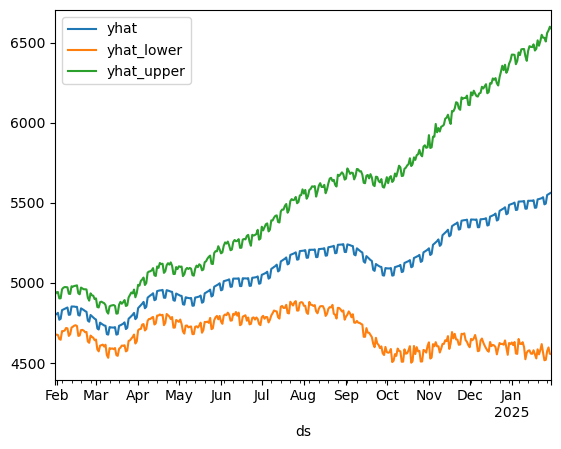

In [81]:
forecast_from_2024[["yhat", "yhat_lower", "yhat_upper"]].plot()

In [66]:
forecast_from_2024.columns

Index(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [82]:
#forecast_from_2024 = forecast_from_2024.loc[["yhat_upper", "yhat_lower", "yhat"]]

# Replace the column names to something less technical sounding
forecast_from_2024 = forecast_from_2024.rename(
    columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case", 
        "yhat": "Most Likely Case"
    }
)

# Review the last five rows of the DataFrame
forecast_from_2024[["Best Case", "Worst Case", "Most Likely Case"]].head(10)

,Best Case,Worst Case,Most Likely Case
ds,,,
2024-01-31,4931.109251,4674.397603,4800.740542
2024-02-01,4941.823100,4677.289389,4805.521500
2024-02-02,4942.898600,4674.635610,4813.314158
2024-02-03,4903.090783,4649.338065,4770.146135
2024-02-04,4903.895958,4645.184796,4775.677029
2024-02-05,4959.783318,4698.910278,4829.850612
2024-02-06,4969.957928,4699.059108,4833.853621
2024-02-07,4973.989421,4703.355456,4838.291641
2024-02-08,4973.665408,4718.583633,4841.181354


<Axes: xlabel='ds'>

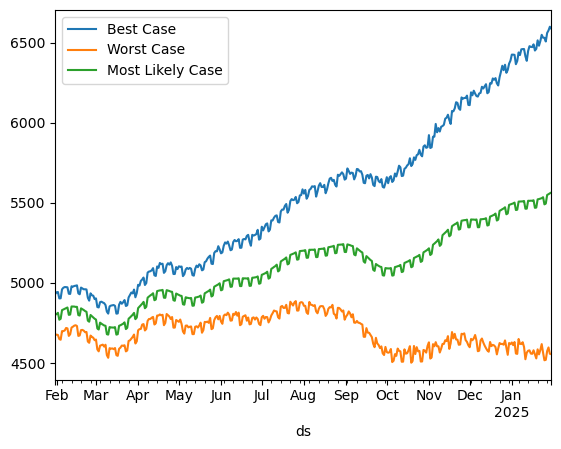

In [83]:
# Repot graph with new labels
forecast_from_2024[["Best Case", "Worst Case", "Most Likely Case"]].plot()

In [71]:
forecast_from_2024[["Best Case", "Worst Case", "Most Likely Case"]].mean()

Best Case           5533.889421
Worst Case          4702.302915
Most Likely Case    5102.418557
dtype: float64